In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Perform Basic EDA

In [6]:
# Load the dataset
df = pd.read_csv("C:/Users/yasir/Downloads/house_price.csv")

# Display basic information and the first few rows
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [10]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [18]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## Q2: Outlier Detection and Removal

 (a) Mean and Standard Deviation Method

In [22]:
# Function to detect outliers using Mean and Standard Deviation method
mean = df["price_per_sqft"].mean()
std_dev = df["price_per_sqft"].std()

# Defining threshold (values beyond 3 standard deviations are considered outliers)
lower_bound = mean - (3 * std_dev)
upper_bound = mean + (3 * std_dev)

# Detect outliers
outliers_std = df[(df["price_per_sqft"] < lower_bound) | (df["price_per_sqft"] > upper_bound)]

# Count of outliers detected using Mean & Standard Deviation method
len(outliers_std)


5

In [51]:
# b)Percentile method
# Percentile method (1st and 99th percentile)
lower_percentile = np.percentile(df["price_per_sqft"], 1)
upper_percentile = np.percentile(df["price_per_sqft"], 99)

outliers_percentile = df[(df["price_per_sqft"] < lower_percentile) | (df["price_per_sqft"] > upper_percentile)]

# c) IQR(Inter quartile range method)
# IQR method
Q1 = np.percentile(df["price_per_sqft"], 25)
Q3 = np.percentile(df["price_per_sqft"], 75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df["price_per_sqft"] < lower_iqr) | (df["price_per_sqft"] > upper_iqr)]

# d) Z Score method
# Z-score method (threshold of 3)
df["z_score"] = (df["price_per_sqft"] - mean) / std_dev
outliers_zscore = df[(df["z_score"] < -3) | (df["z_score"] > 3)]

# Count of outliers detected by each method
print("Outliers detected using percentile:", len(outliers_percentile))
print("Outliers detected using IQR :", len(outliers_iqr))
print("Outliers detected using Z_score:", len(outliers_z))



Outliers detected using percentile: 259
Outliers detected using IQR : 1265
Outliers detected using Z_score: 5


## Q3.Removing these outliers using different techniques

C:\Users\yasir\AppData\Local\Temp\ipykernel_2568\2655289126.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7920.336742424242' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mean_imputed.loc[df["z_score"].abs() > 3, "price_per_sqft"] = mean  # Mean Imputation (Z-Score)


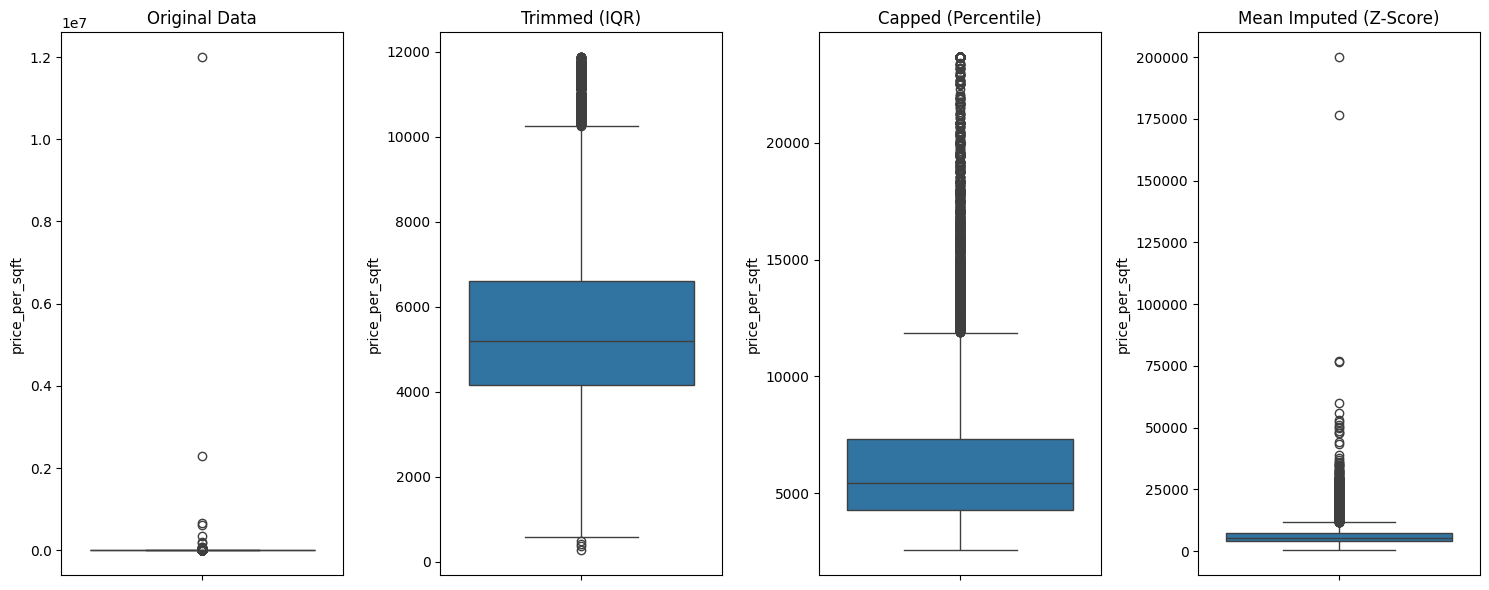

In [54]:
# Remove outliers using different methods
df_trimmed = df[(df["price_per_sqft"] >= lower_iqr) & (df["price_per_sqft"] <= upper_iqr)]  # Trimming (IQR)
df_capped = df.copy()
df_capped["price_per_sqft"] = np.clip(df["price_per_sqft"], lower_percentile, upper_percentile)  # Capping (Percentile)
df_mean_imputed = df.copy()
df_mean_imputed.loc[df["z_score"].abs() > 3, "price_per_sqft"] = mean  # Mean Imputation (Z-Score)

# Plot box plots for comparison
plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1)
sns.boxplot(y=df["price_per_sqft"])
plt.title("Original Data")

plt.subplot(1, 4, 2)
sns.boxplot(y=df_trimmed["price_per_sqft"])
plt.title("Trimmed (IQR)")

plt.subplot(1, 4, 3)
sns.boxplot(y=df_capped["price_per_sqft"])
plt.title("Capped (Percentile)")

plt.subplot(1, 4, 4)
sns.boxplot(y=df_mean_imputed["price_per_sqft"])
plt.title("Mean Imputed (Z-Score)")

plt.tight_layout()
plt.show()


Original Data: Many outliers are visible.

Trimmed (IQR Method): Most extreme outliers are removed.

Capped (Percentile Method): Outliers are brought within the threshold.

Mean Imputed (Z-Score Method): Few outliers replaced with mean, but distribution remains similar

The IQR method appears to be the most effective for removing outliers while maintaining data integrity.

## Q4. plot a histogram to check the normality

In [64]:
from scipy.stats import skew, kurtosis, zscore

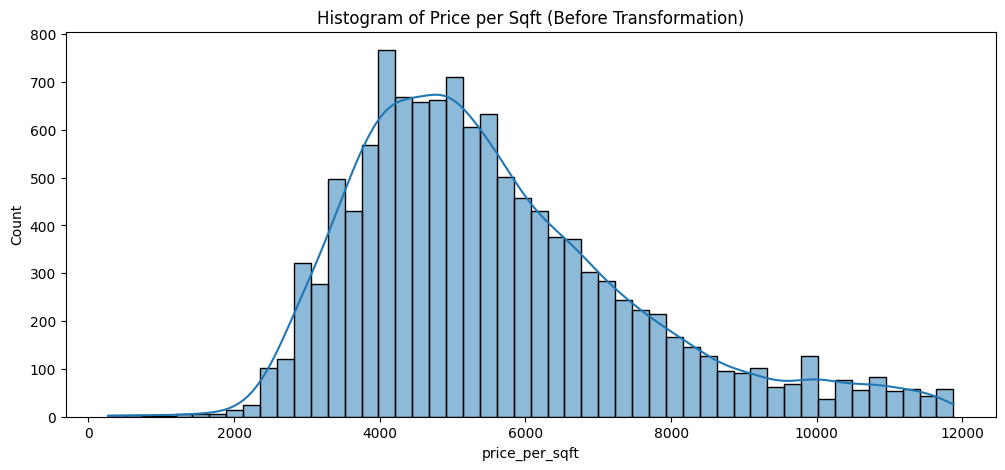

(0.9445732298531184, 0.6784399584501744)

In [68]:
# Plot histogram before transformation
plt.figure(figsize=(12, 5))
sns.histplot(df_trimmed["price_per_sqft"], kde=True, bins=50)
plt.title("Histogram of Price per Sqft (Before Transformation)")
plt.show()

# Check skewness and kurtosis before transformation
skew_before = skew(df_trimmed["price_per_sqft"])
kurtosis_before = kurtosis(df_trimmed["price_per_sqft"])

skew_before, kurtosis_before


C:\Users\yasir\AppData\Local\Temp\ipykernel_2568\2361875995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed["price_per_sqft_log"] = np.log1p(df_trimmed["price_per_sqft"])


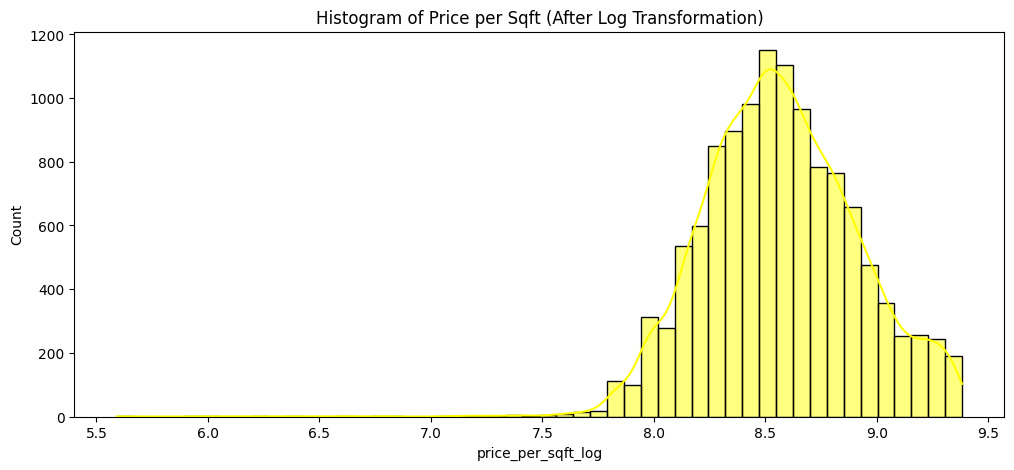

(-0.12988210833124453, 1.3369230684904956)

In [80]:
# Apply log transformation
df_trimmed["price_per_sqft_log"] = np.log1p(df_trimmed["price_per_sqft"])

# Plot histogram after transformation
plt.figure(figsize=(12, 5))
sns.histplot(df_trimmed["price_per_sqft_log"], kde=True, bins=50, color='yellow')
plt.title("Histogram of Price per Sqft (After Log Transformation)")
plt.show()

# Check skewness and kurtosis after transformation
skew_after = skew(df_trimmed["price_per_sqft_log"])
kurtosis_after = kurtosis(df_trimmed["price_per_sqft_log"])

skew_after, kurtosis_after


## Q5.correlation check

In [88]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390


In [100]:
# remove non-numeric columns
df_corr = df_trimmed.drop(columns=["location","size"])
corr_matrix = df_corr.corr()


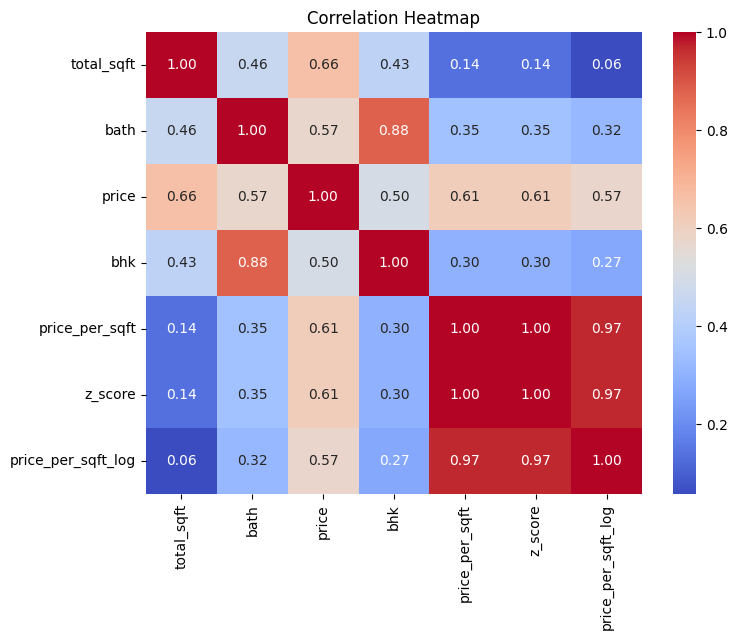

In [102]:
# Select only numeric columns for correlation matrix
df_numeric = df_trimmed.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Q6. correlation checking using Scatter plot

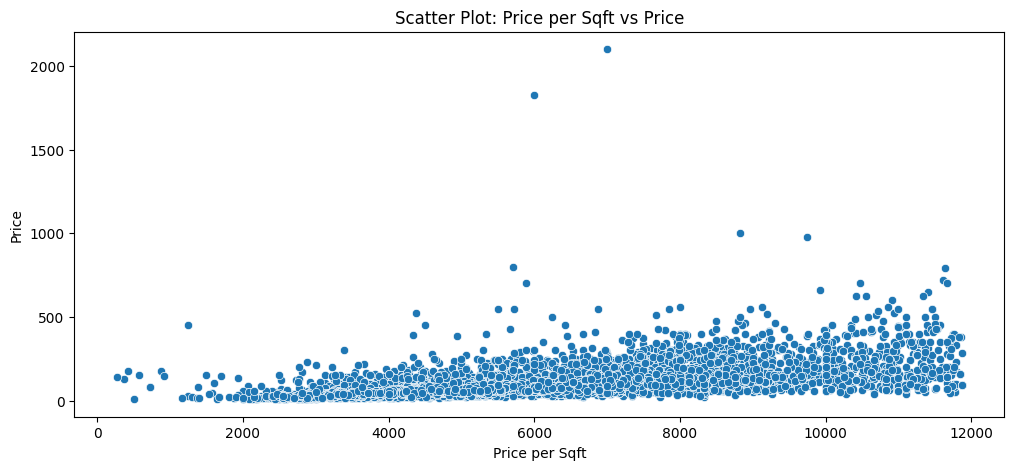

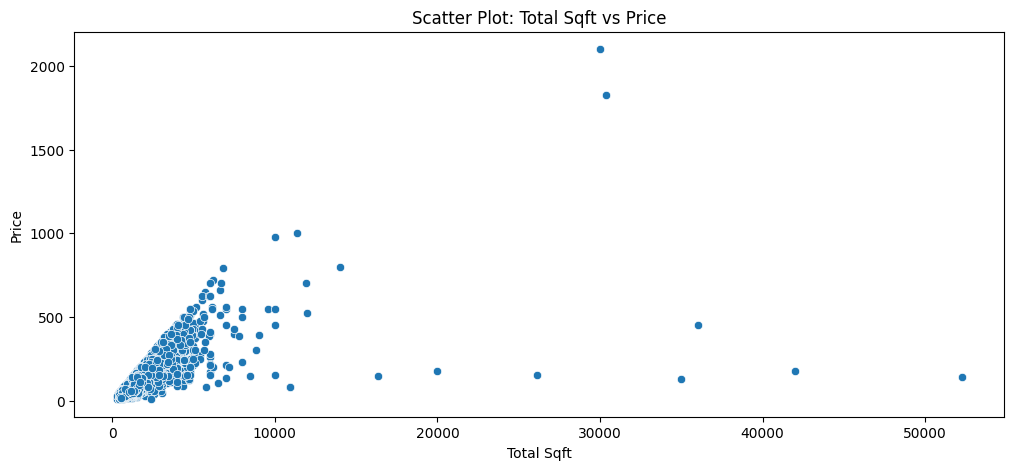

In [107]:
# Scatter plot between price_per_sqft and price
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_trimmed["price_per_sqft"], y=df_trimmed["price"])
plt.title("Scatter Plot: Price per Sqft vs Price")
plt.xlabel("Price per Sqft")
plt.ylabel("Price")
plt.show()

# Scatter plot between total_sqft and price
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_trimmed["total_sqft"], y=df_trimmed["price"])
plt.title("Scatter Plot: Total Sqft vs Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.show()
